Investigating terrain and forest cover affects on off-nadir GOES-16 ABI surface brightness temperatures in comparison with nadir looking Terra ASTER.

In [1]:
import xarray as xr
import rioxarray
import numpy as np
import matplotlib.pyplot as plt

Set plot font sizes

In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


Set up working area geometry

In [3]:
# Larger area around Tuolumne further south and east to include Mammoth
(utm_e_UL, utm_n_UL) = 282500, 4205000
(utm_e_UR, utm_n_UR) = 305000, 4205000
(utm_e_LR, utm_n_LR) = 327500, 4160000
(utm_e_LL, utm_n_LL) = 305000, 4160000

geometry = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [utm_e_UL, utm_n_UL],
            [utm_e_UR, utm_n_UR],
            [utm_e_LR, utm_n_LR],
            [utm_e_LL, utm_n_LL]
        ]]
    }
]

---
---
### Open dataset

In [4]:
ds = xr.open_dataset('/storage/spestana/ASTER-MODIS-GOES-DEM-FVEG_v4_orthorectified.nc')
ds = ds.rio.clip(geometry)

---
### Tree Canopy Cover

Make two zones based on TCC, using the median as the threshold between the two groups. Then look at ASTER temperatures within each zone, and surface temperature biases (ABI-ASTER) within each zone.

ASTER surface brightness temperatures:

In [5]:
xx = ds.tcc.values.ravel()
xx = xx[~np.isnan(xx)] # remove nans
xx = xx[xx!=0]
np.quantile(xx, 0.50) # median


38.0

In [6]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        # find the 50% quantile (median) (or some other quantile) and use that as the threshold
        #xx = ds.tcc.values.ravel()
        #xx = xx[~np.isnan(xx)] # remove nans
        #xx = xx[xx!=0] # remove zeros
        k = 0 #np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.tcc > k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.tcc <= k).isel(time=i).values.ravel())

/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

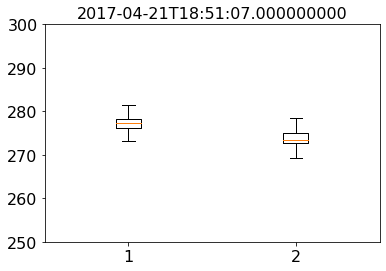

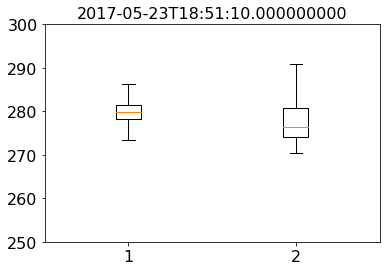

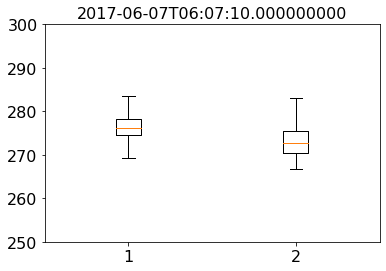

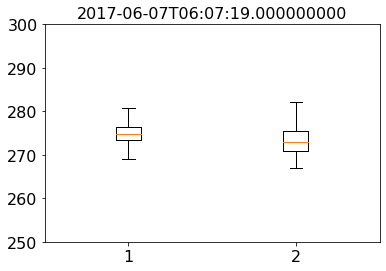

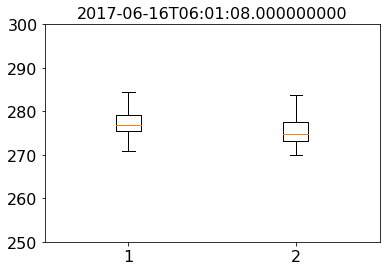

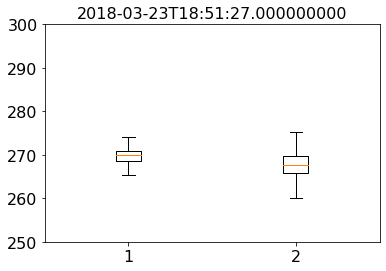

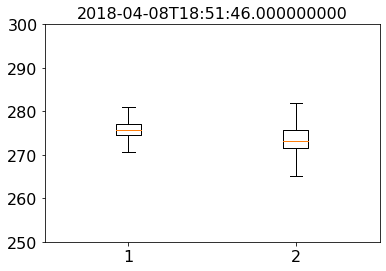

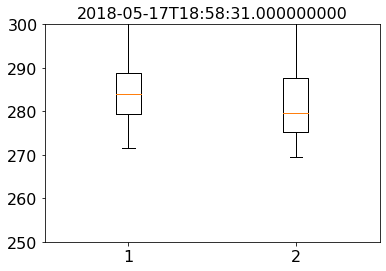

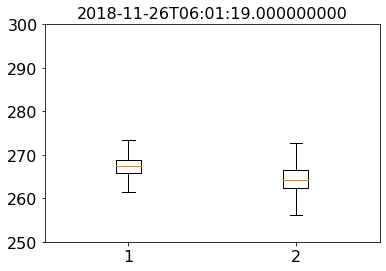

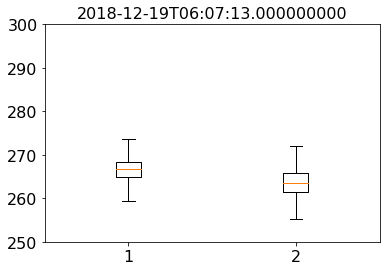

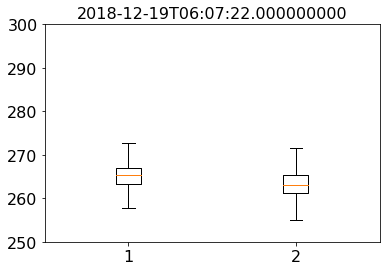

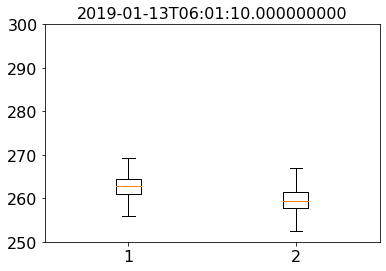

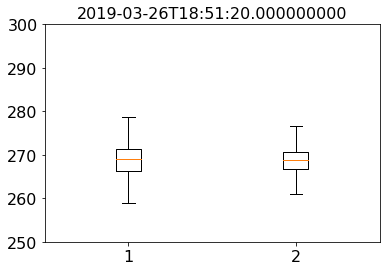

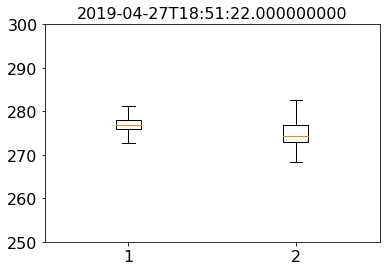

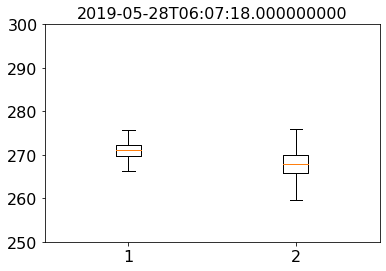

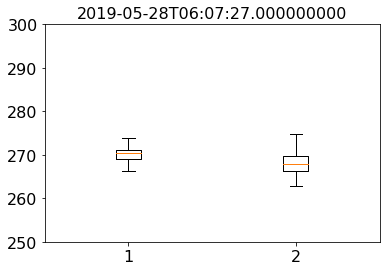

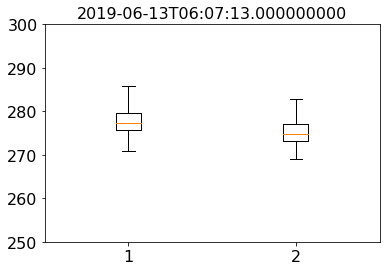

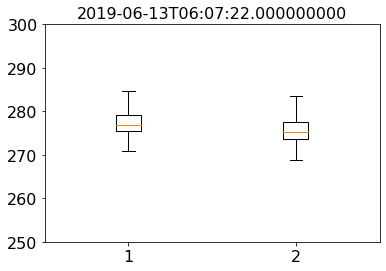

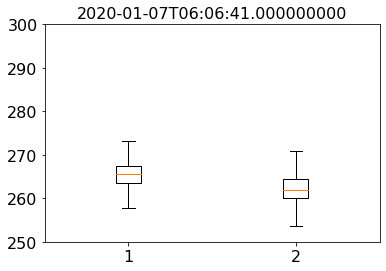

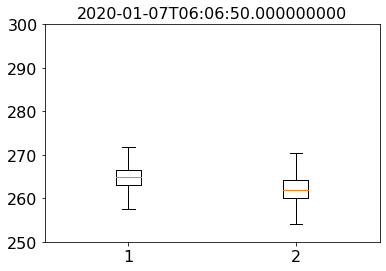

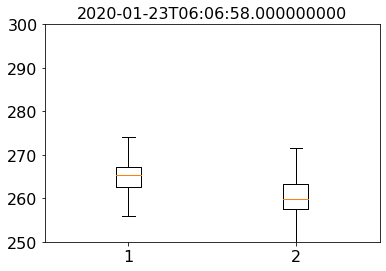

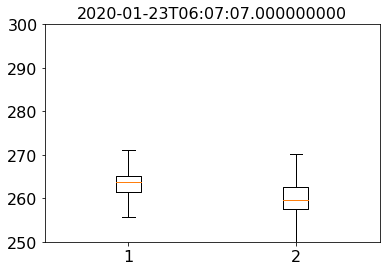

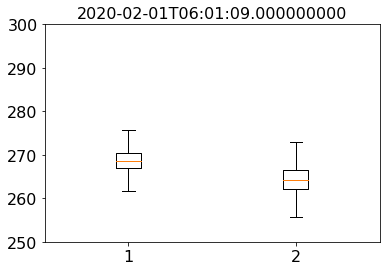

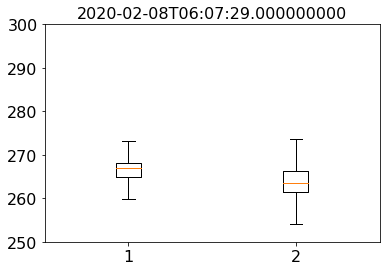

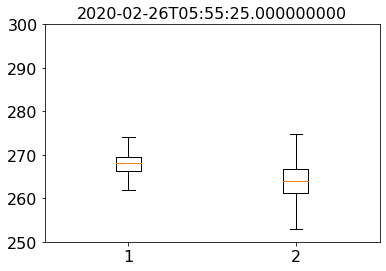

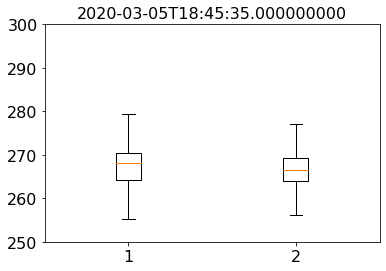

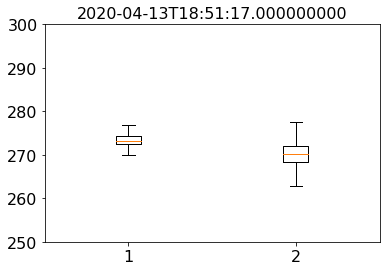

In [7]:
for n, _ in enumerate(ds.time.values):
    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]

    #print(len(gt_k_n),len(lt_k_n))
    plt.figure()
    plt.boxplot([gt_k_n, 
                lt_k_n], showfliers=False);
    plt.title(times[n])
    plt.ylim(250,300);

ABI-ASTER surface brightness temperature differences:

In [8]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        # find the 50% quantile (median) (or some other quantile) and use that as the threshold
        #xx = ds.tcc.values.ravel()
        #xx = xx[~np.isnan(xx)] # remove nans
        #xx = xx[xx!=0] # remove zeros
        k = 0 #np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_mean_diff_tb.where(ds.tcc > k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_mean_diff_tb.where(ds.tcc <= k).isel(time=i).values.ravel())

/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

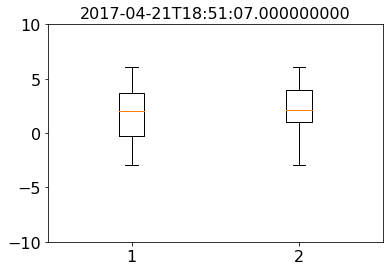

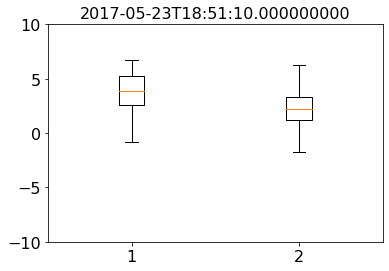

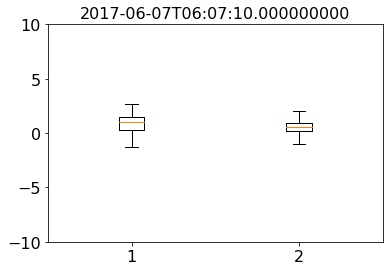

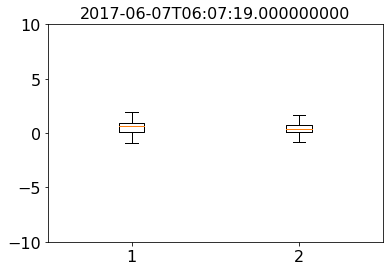

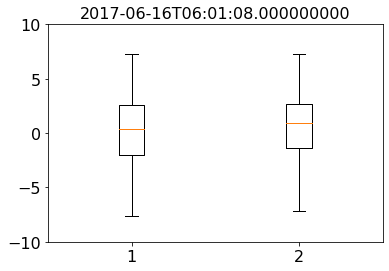

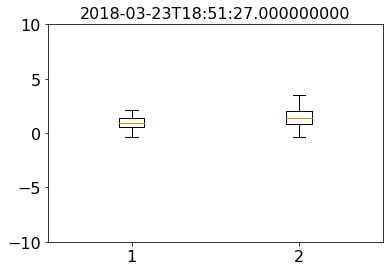

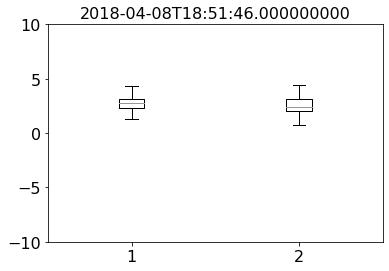

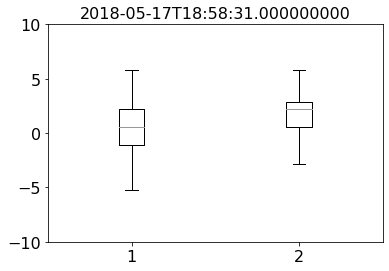

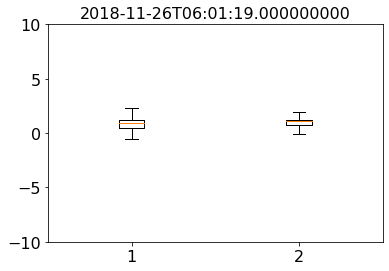

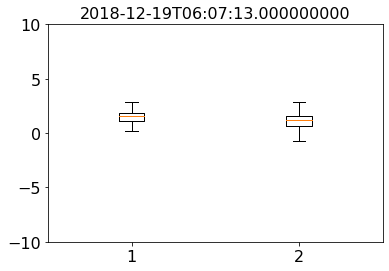

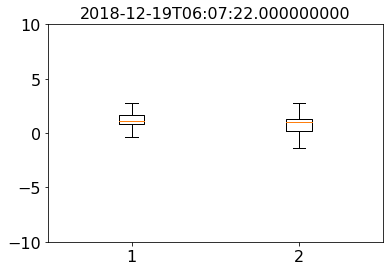

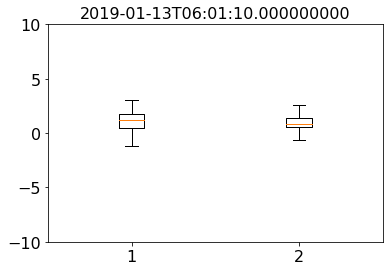

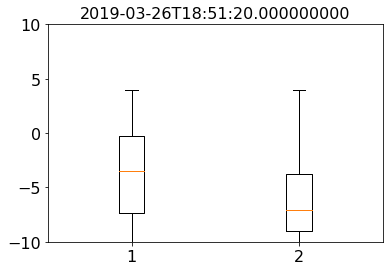

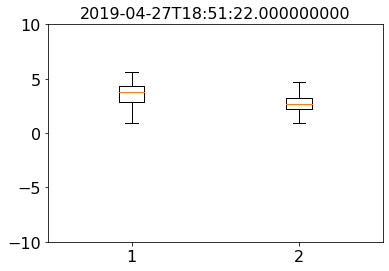

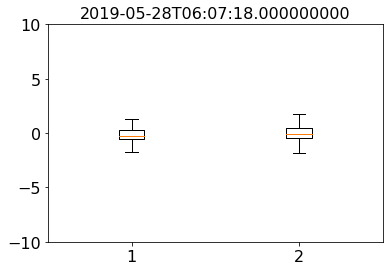

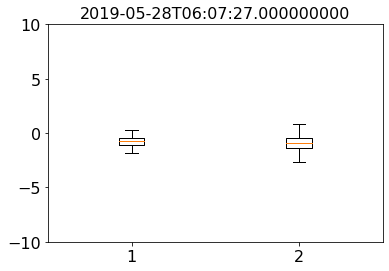

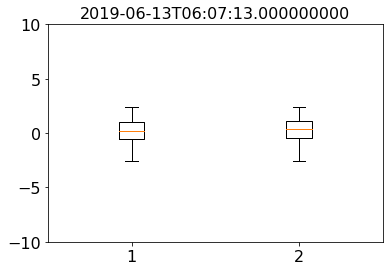

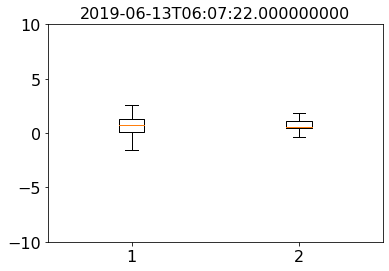

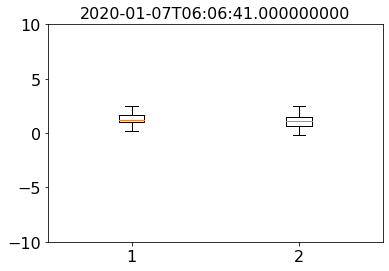

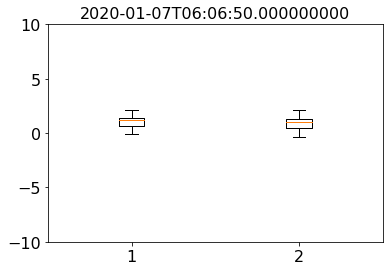

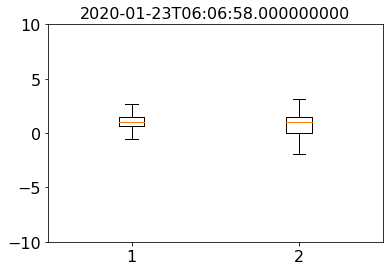

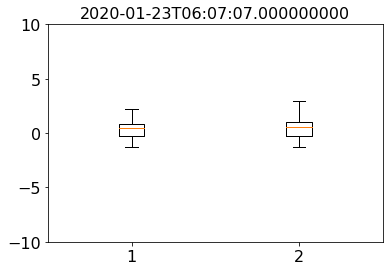

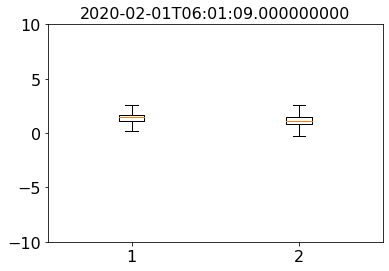

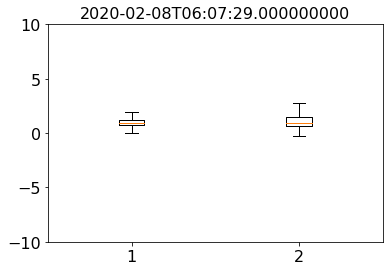

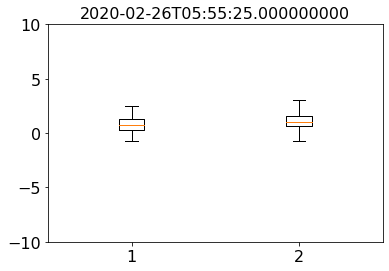

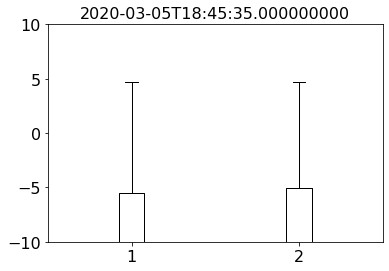

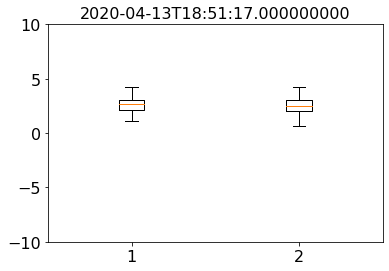

In [9]:
for n, _ in enumerate(ds.time.values):
    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]

    #print(len(gt_k_n),len(lt_k_n))
    plt.figure()
    plt.boxplot([gt_k_n, 
                lt_k_n], showfliers=False);
    plt.title(times[n])
    plt.ylim(-10,10);

While the trees (ASTER temperatures where tcc>0) do appear warmer in many of the images (both day and night it seems), the ABI-ASTER biases between trees and no trees seem both about the same in each image (note, these biases are computed from the upscaled ABI resolution ASTER, so we don't really have the spatial resolution to see much of anything anyways, this second set of plots is probably not very useful)

---
### Terrain

Make two zones based on the terrain hillshade from the satellite's point of view, where brighter terrain (1) means that the satellite's line of sight is normal to the land surface, grey (0) means that the angle is perpendicular, and black (-1) is facing the opposite direction.

Again, use the median hillshade value as the threshold between the two groups. Then look at ASTER temperatures within each zone, and surface temperature biases (ABI-ASTER) within each zone.

ASTER surface brightness temperatures:

In [16]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        # find the 50% quantile (median) (or some other quantile) and use that as the threshold
        xx = ds.sat_hillshade.isel(time=i).values.ravel()
        xx = xx[~np.isnan(xx)] # remove nans
        k = np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade >= k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade < k).isel(time=i).values.ravel())

/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

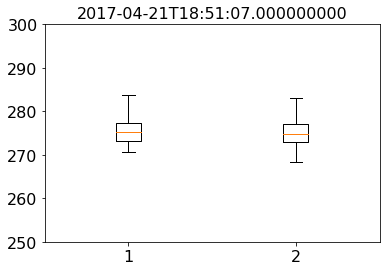

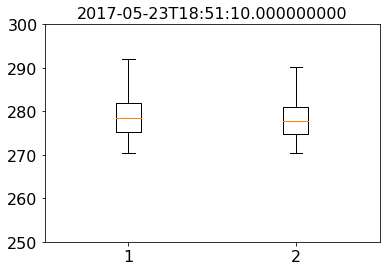

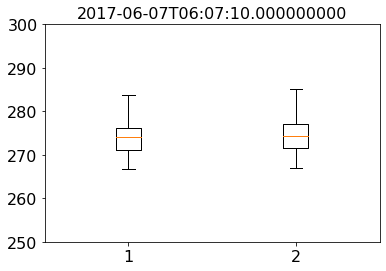

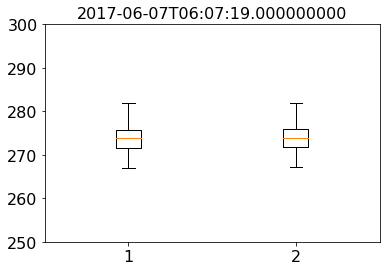

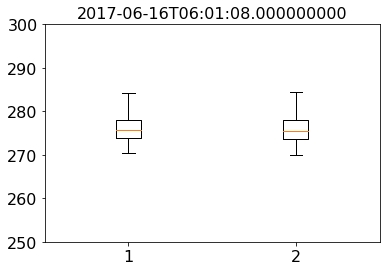

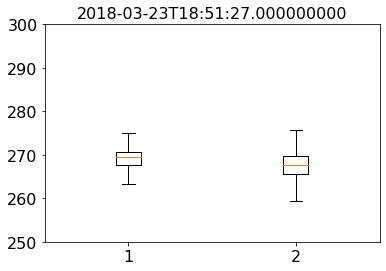

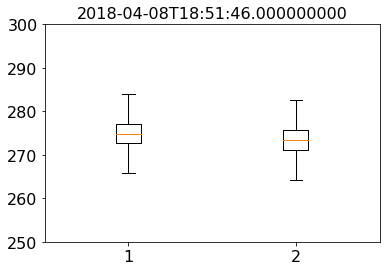

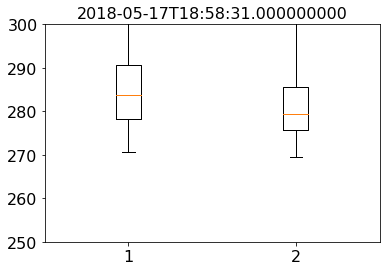

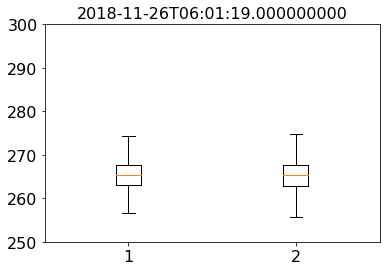

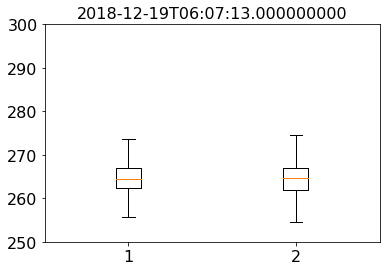

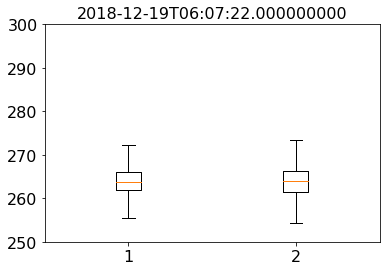

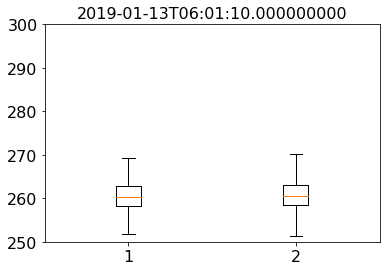

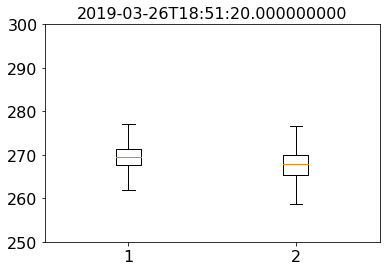

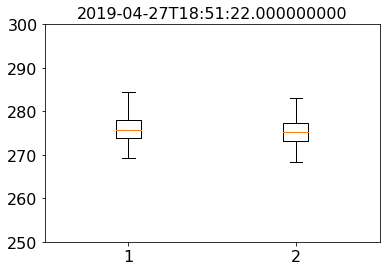

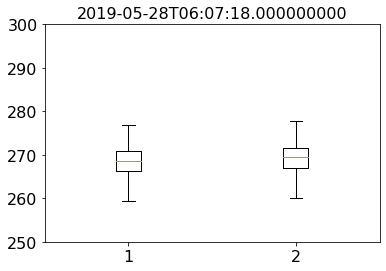

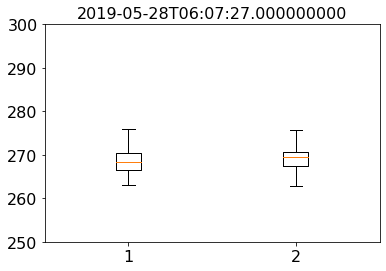

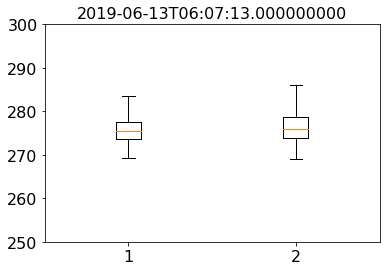

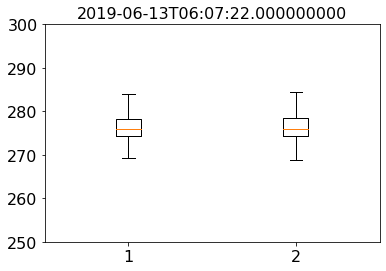

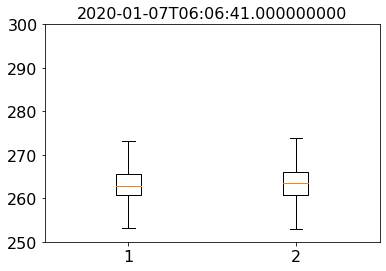

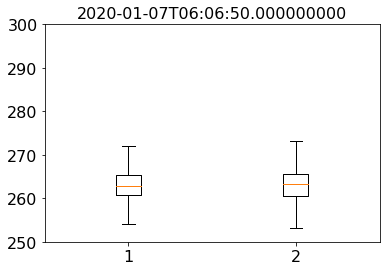

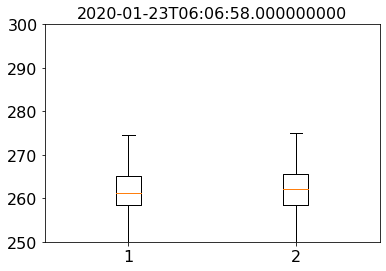

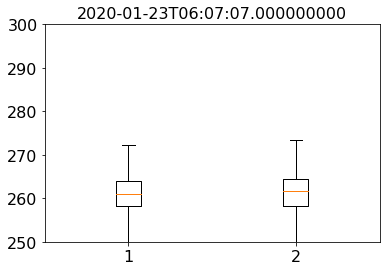

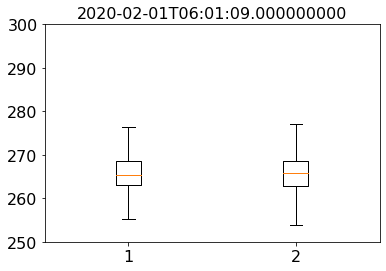

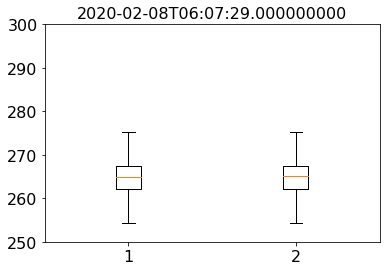

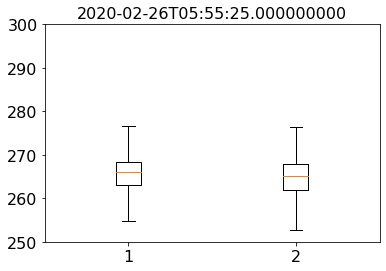

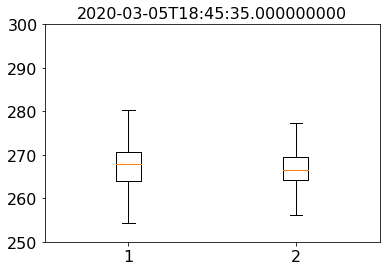

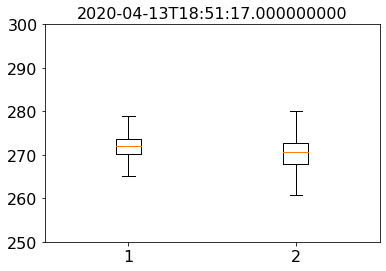

In [17]:
for n, _ in enumerate(ds.time.values):
    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]

    #print(len(gt_k_n),len(lt_k_n))
    plt.figure()
    plt.boxplot([gt_k_n, 
                lt_k_n], showfliers=False);
    plt.title(times[n])
    plt.ylim(250,300);

ABI-ASTER surface brightness temperature differences:

In [18]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        # find the 50% quantile (median) (or some other quantile) and use that as the threshold
        xx = ds.sat_hillshade.isel(time=i).values.ravel()
        xx = xx[~np.isnan(xx)] # remove nans
        k = np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_mean_diff_tb.where(ds.sat_hillshade >= k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_mean_diff_tb.where(ds.sat_hillshade < k).isel(time=i).values.ravel())

/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly clo

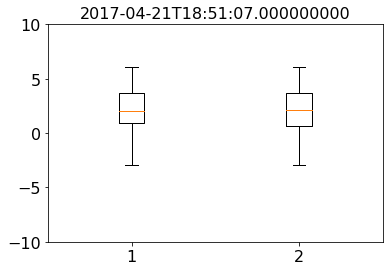

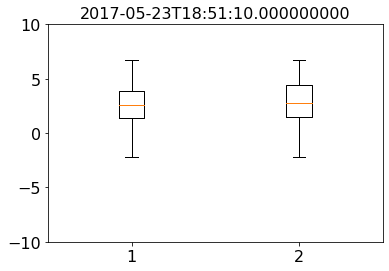

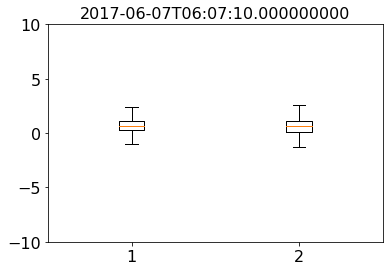

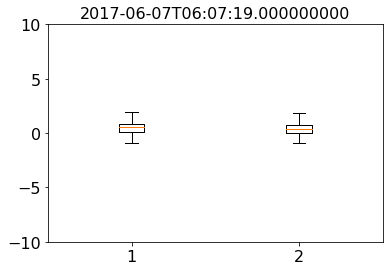

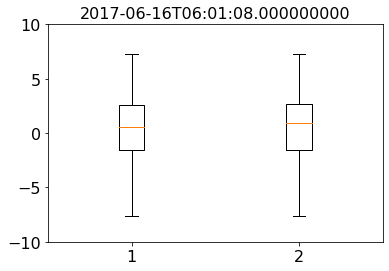

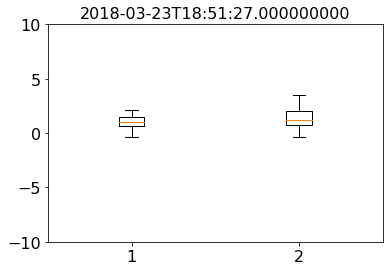

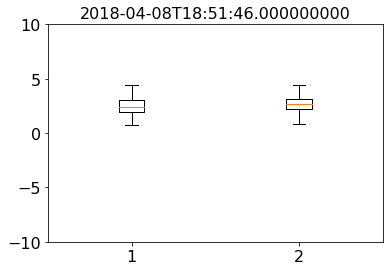

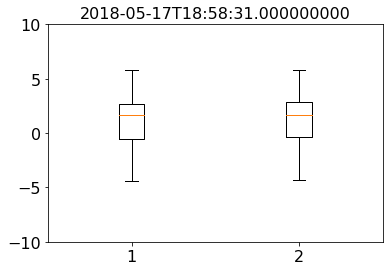

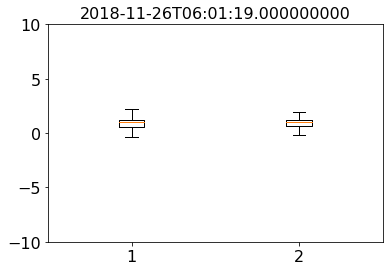

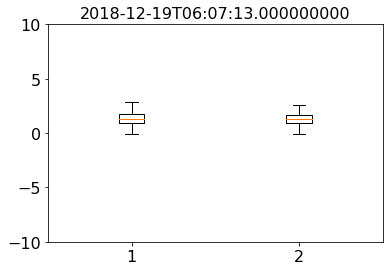

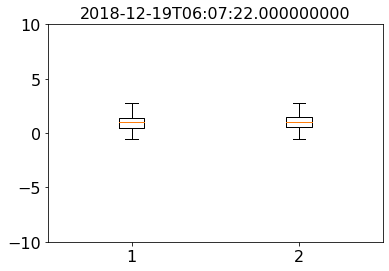

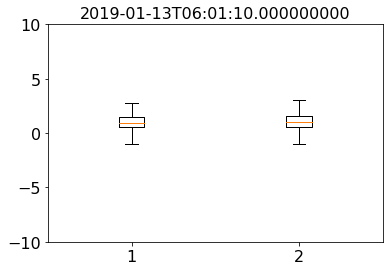

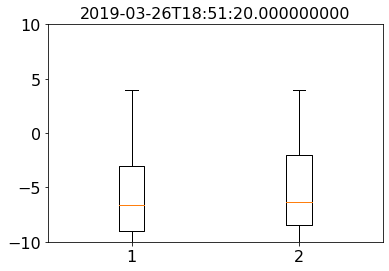

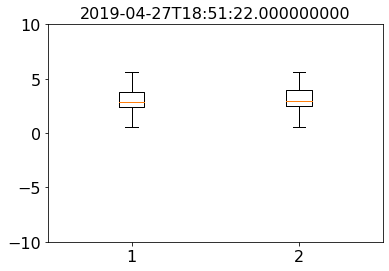

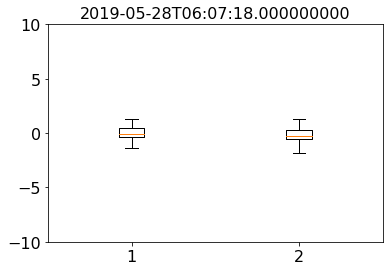

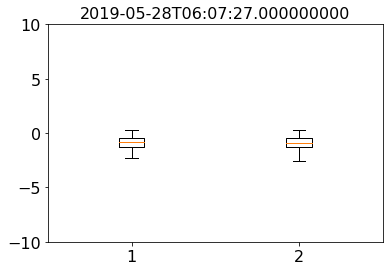

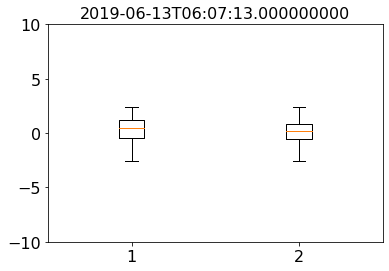

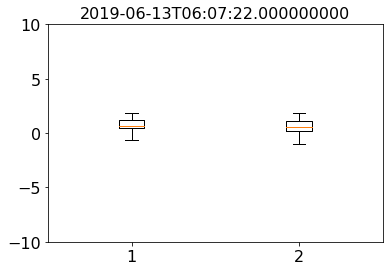

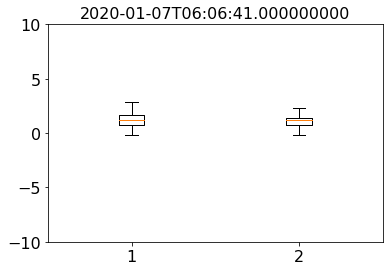

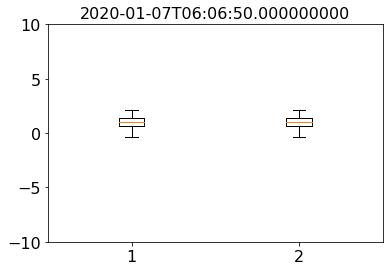

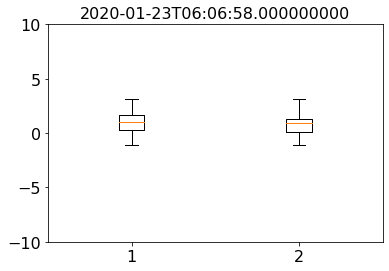

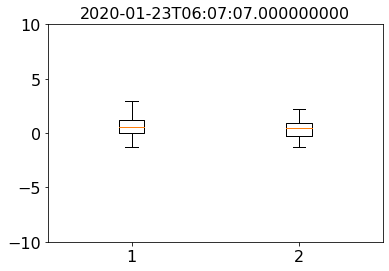

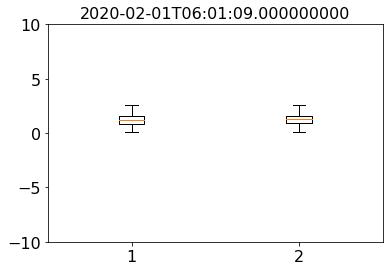

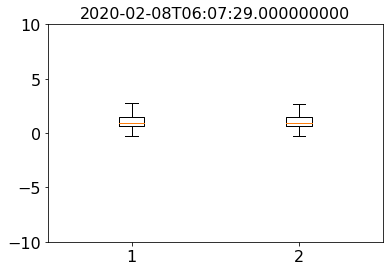

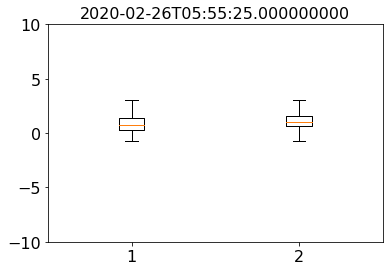

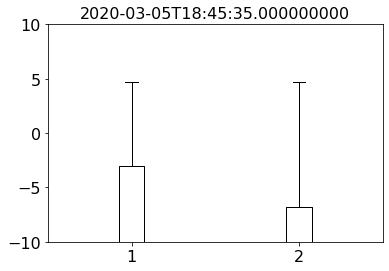

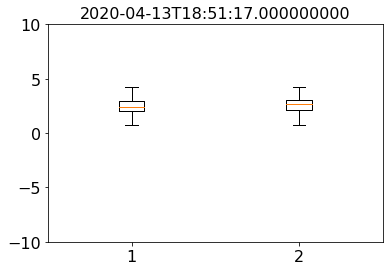

In [19]:
for n, _ in enumerate(ds.time.values):
    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]

    #print(len(gt_k_n),len(lt_k_n))
    plt.figure()
    plt.boxplot([gt_k_n, 
                lt_k_n], showfliers=False);
    plt.title(times[n])
    plt.ylim(-10,10);

---
### Sun + Terrain

Make two zones based on the terrain hillshade from the sun.

Again, use the median hillshade value as the threshold between the two groups. Then look at ASTER temperatures within each zone, and surface temperature biases (ABI-ASTER) within each zone.

ASTER surface brightness temperatures:

In [29]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 12:
        # find the 50% quantile (median) (or some other quantile) and use that as the threshold
        xx = ds.solar_hillshade.isel(time=i).values.ravel()
        xx = xx[~np.isnan(xx)] # remove nans
        k = np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade >= k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade < k).isel(time=i).values.ravel())

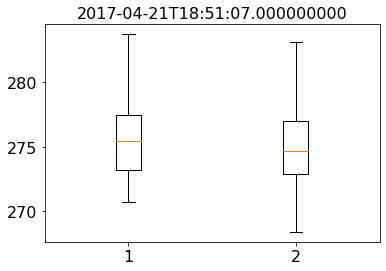

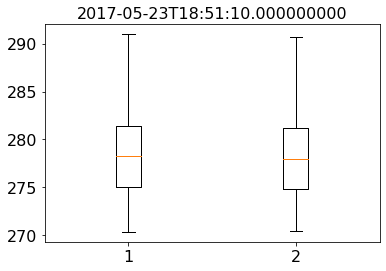

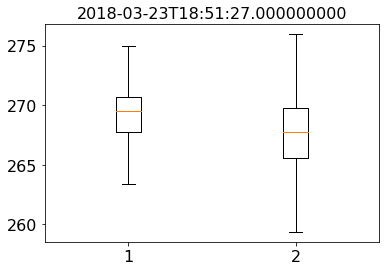

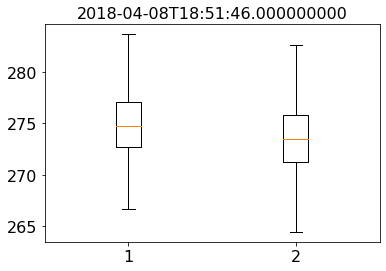

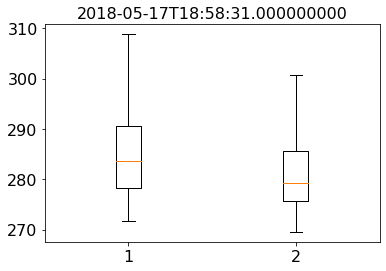

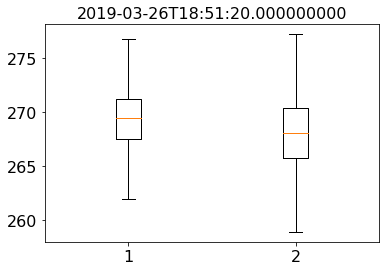

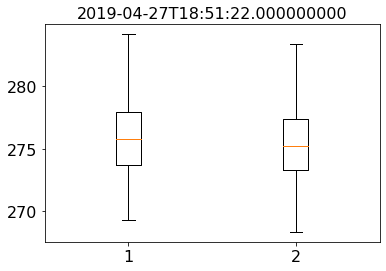

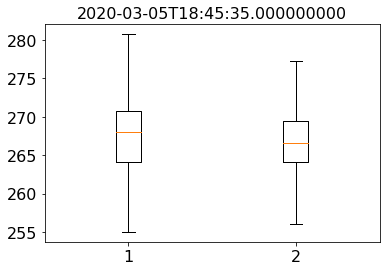

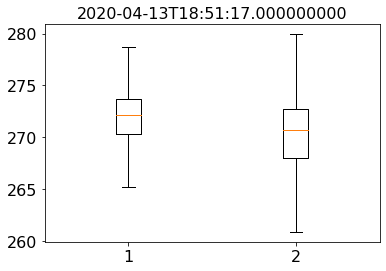

In [30]:
for n in range(0,len(times)):
    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]

    #print(len(gt_k_n),len(lt_k_n))
    plt.figure()
    plt.boxplot([gt_k_n, 
                lt_k_n], showfliers=False);
    plt.title(times[n])
    #plt.ylim(-10,10);